## Problem Statement

 **QUESTION**: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, **the task is to create an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence. 

 Estimates from the system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, why the system outputs a certain prediction must be explained.
 
 You're given a [CSV file](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv) containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers. 
 <img src="https://i.imgur.com/87Uw0aG.png" width="480">

 Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets

## Step 0: Preparation

In [28]:
insurance_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [29]:
from urllib.request import urlretrieve

In [30]:
urlretrieve(insurance_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x1a22d052bc0>)

In [31]:
!pip install pandas-profiling --quiet

In [32]:
import pandas as pd

In [33]:
medical_df =pd.read_csv('medical.csv')

In [34]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [35]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [36]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Step 1: Exploratory Analysis and Visualization

In [37]:
!pip install plotly matplotlib seaborn --quiet

In [38]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### AGE

In [40]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [41]:
fig = px.histogram(medical_df,
                   x = 'age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

### Body Mass Index

In [42]:
medical_df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [43]:
fig = px.histogram(medical_df,
                   x= 'bmi',
                   marginal='box',
                   color_discrete_sequence=['crimson'],
                   title='Distribution of Body Mass Index (BMI)')
fig.update_layout(bargap = 0.1)
fig.show()

### Charges

In [44]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['red', 'blue'],
                   title='Annual Medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

### Charges in connection with sex

In [45]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['aqua', 'azure'],
                   title='Annual Medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

### Charges in connection with region

In [46]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['lavender', 'lime', 'olive', 'plum'],
                   title='Annual Medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

### Smoker

In [47]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [48]:
px.histogram(medical_df, x='smoker', color= 'sex', title='Smoker')

### Sex 

In [49]:
medical_df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [50]:
px.histogram(medical_df, x='sex', color = 'sex', color_discrete_sequence=['pink', 'blue'], title='Sex')

### Region

In [51]:
medical_df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [52]:
px.histogram(medical_df, x = 'region', color = 'region', color_discrete_sequence= ['royalblue', 'saddlebrown', 'salmon', 'sandybrown'], title='Region')

### Age and Charges

In [53]:
fig = px.scatter(medical_df,
                 x= 'age',
                 y= 'charges',
                 color= 'smoker',
                 opacity= 0.8,
                 hover_data= ['sex'],
                 title= 'Age vs Charges')
fig.update_traces(marker_size= 5)
fig.show()

### BMI vs Charges

In [54]:
fig = px.scatter(medical_df,
                 x= 'bmi',
                 y= 'charges',
                 color= 'smoker',
                 opacity= 0.8,
                 hover_data= ['sex'],
                 title= 'BMI vs Charges')
fig.update_traces(marker_size= 5)
fig.show()

### Children vs Charges

In [68]:
fig = px.violin(medical_df, y='charges', x='children', title= 'Children vs Charges', box=True)
fig.show()

### Sex vs Charges

C:\Users\rsars\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\rsars\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\rsars\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



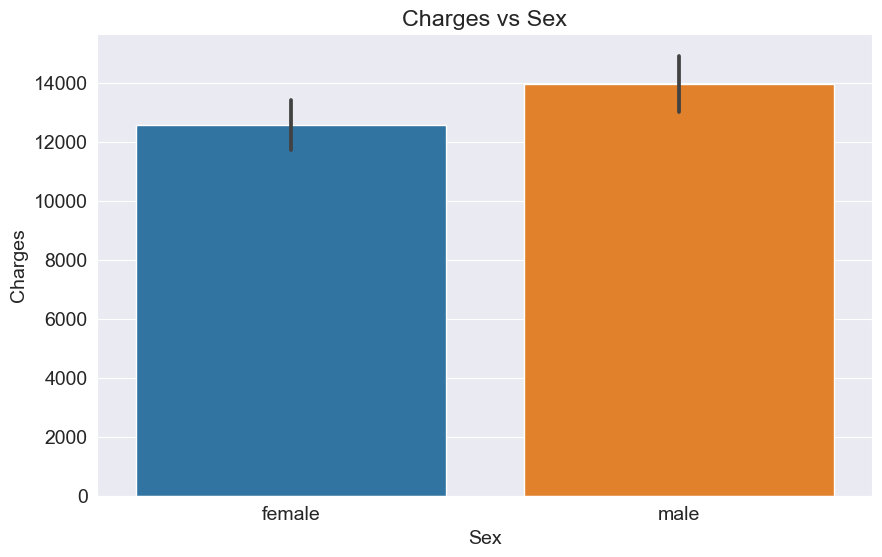

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(data=medical_df, x='sex', y='charges')
plt.title('Charges vs Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

### Region vs Charges

In [70]:
fig = px.violin(medical_df, y='charges', x='region', title= 'Region vs Charges', box=True)
fig.show()

### Smoker vs Smoker

In [71]:
fig = px.violin(medical_df, x='smoker', y='charges', box=True, points="all")
fig.update_layout(title='Charges vs Smoker', xaxis_title='Smoker', yaxis_title='Charges')
fig.show()

## Correlation

In [72]:
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [73]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [74]:
smoker_values= {'no': 0, 'yes': 1}
smoker_numeric= medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984778

In [79]:
medical_df.corr(numeric_only= True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

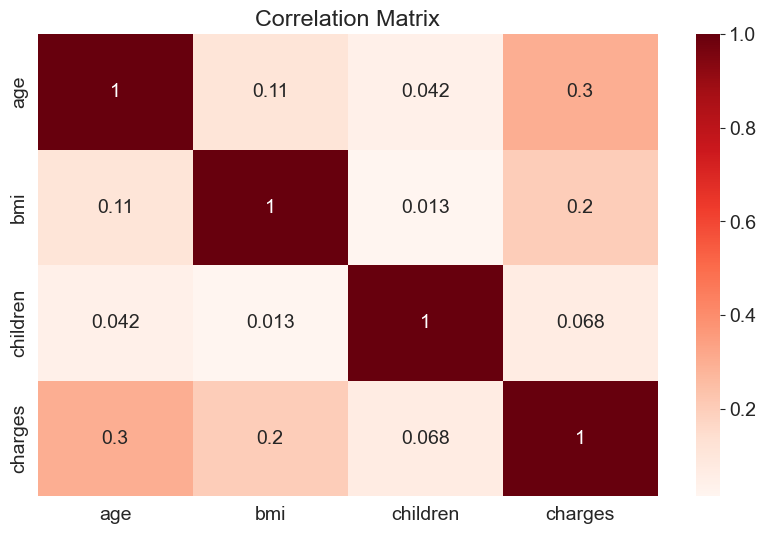

In [81]:
sns.heatmap(medical_df.corr(numeric_only= True), cmap='Reds', annot=True)
plt.title('Correlation Matrix')